# Task 3

## General instructions

First, update the following cell to have a link to your Homework 2 GitHub repository

**UPDATE THIS LINK**

https://github.com/fletcher-m/eds220-hwk-2

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Acknowledgments

This exercise is based on this [NCEAS Learning Hub R lesson](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).

Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.

## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed here at KNB:

 [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886- 1997). Gulf of Alaska Data Portal. df35b.304.2.](https://knb.ecoinformatics.org/view/df35b.304.2)

The dataset is in a csv file in the homework's repo (salmon_data.csv) and has the following columns:

- Region: region code
- Year: year fish were caught
- notesRegCode: notes and comments
- Species: species of salmon caught
- Catch: commercial catches of salmon species (in tousands of fish)


## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

<AxesSubplot:title={'center':'Average Annual Salmon Catches by Region (1878-1997)'}, xlabel='Region', ylabel='Number of Fish (in thousands)'>

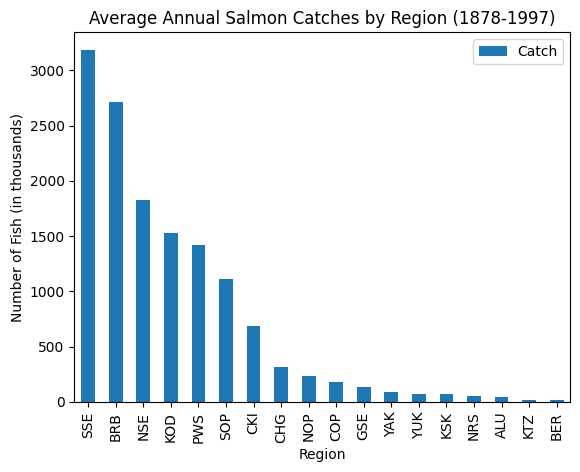

In [33]:
# import pandas with stnd. abbr.
import pandas as pd

# read in salmon data
catch_original = pd.read_csv('salmon_data.csv')

# look at first 5 rows of data frame
catch_original.head()

# find the unique values in the 'notesRegCode' column
catch_original.notesRegCode.unique()

# get rid of 'notesRegCode' column from data frame
catch_original = catch_original.drop(['notesRegCode'], axis=1)

# check data frame to confirm 'notesRegCode' column is not longer there 
catch_original

# check data types of columns in catch_original
catch_original.dtypes

# filter to all rows in 'Catch' column with a value of 'I'
catch_original[catch_original['Catch']=='I']

# change value of row 400 in 'Catch' column from 'I' to 1
catch_original.at[400, 'Catch'] = 1

# verify the value is now 1
catch_original.at[400, 'Catch']

# update 'Catch column to be 'int64' instead of 'object'
catch_original['Catch'] = catch_original.Catch.astype('int64')

# confirm that the 'Catch' column is of type 'int64'
catch_original.dtypes

# create a new data frame ('catch_region') that lists the average catch per region
catch_region = catch_original.groupby('Region').mean()

# Sort each region to be in descending order by average catch value
catch_region_sorted = catch_region.sort_values('Catch', ascending=False)

# Plot bar graph of average salmon catches by region 
catch_region_sorted.plot(kind = 'bar',
                         y='Catch',
                         title= "Average Annual Salmon Catches by Region (1878-1997)",
                         ylabel="Number of Fish (in thousands)")

## 1

Import the data from the `salmon_data.csv` as `catch_original` and look at the head of the dataframe.

In [2]:
# import pandas with stnd. abbr.
import pandas as pd

# read in salmon data
catch_original = pd.read_csv('salmon_data.csv')

# look at first 5 rows of data frame
catch_original.head()

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


## 2
In the next cell:
1. Print the unique values (not the number of unique values) of the `notesRegCode` column. 
2. Update the dataframe so it doesn't have the `notesRegCode` column.
3. Verify the column is no longer in the dataframe.

In [3]:
# print the unique values in the 'notesRegCode' column
print(catch_original.notesRegCode.unique())

# get rid of 'notesRegCode' column from data frame
catch_original = catch_original.drop(['notesRegCode'], axis=1)

# check data frame to confirm 'notesRegCode' column is not longer there 
catch_original

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

,Region,Year,Species,Catch
0,SSE,1886,Chinook,0
1,SSE,1887,Chinook,0
2,SSE,1888,Chinook,0
3,SSE,1889,Chinook,0
4,SSE,1890,Chinook,0
...,...,...,...,...
8535,NOP,1993,Chum,135
8536,NOP,1994,Chum,84
8537,NOP,1995,Chum,99
8538,NOP,1996,Chum,68


## 3
In the next cell, check the data types of the columns. Does each column have the expected data type? Write your answer as a short comment in the same cell.


In [4]:
# check data types of columns in catch_original
catch_original.dtypes

# ANSWER: The 'year' column makes sense, because years appear as integer values. I would expect the 'Catch' column
# to be 'int64' as well, but instead it is 'object'. I would expect the 'Species' column to be 'str' but it is object.
# This makes sense because Python will often assign strings within columns as dtype 'object'.

Region     object
Year        int64
Species    object
Catch      object
dtype: object

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`.

Run the next cell and read the end of the error message closely.

In [ ]:
# to use `astype` we select a specifc column
#  and then indicate the dtype we want to convert to
#  astype does not modify the column in place
catch_original.Catch.astype('int64')

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out this data set is from a PDF which was automatically converted into a csv and this value of 'I' is actually a 1.

In the next cell find the row(s) that is causing this issue. Show the filtered row(s) as the output.

In [6]:
# filter to all rows in 'Catch' column with a value of 'I'
catch_original[catch_original['Catch']=='I']

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


## 6
In the next cell:

1. Update the value of I to 1. HINT: you could use the `at` method to access a single value in the dataframe.
2. Access the row you updated to verify the value was changed.

In [7]:
# change value of row 400 in 'Catch' column from 'I' to 1
catch_original.at[400, 'Catch'] = 1

# verify the value is now 1
catch_original.at[400, 'Catch']

1

## 7
In the next cell:

1. Update the Catch column in `catch_data` to be of type `int64`.
2. Check the dtypes of the columns.

In [8]:
# update 'Catch column to be 'int64' instead of 'object'
catch_original['Catch'] = catch_original.Catch.astype('int64')

# confirm that the 'Catch' column is of type 'int64'
catch_original.dtypes

Region     object
Year        int64
Species    object
Catch       int64
dtype: object

## 8
Create a dataframe with the average catch per region. HINT: use `groupby()`. Store your dataframe in new variable.


In [30]:
# create a new data frame ('catch_region') that lists the average catch per region
catch_region = catch_original.groupby('Region').mean()

# display the new data frame
catch_region

,Year,Catch
Region,,
ALU,1954.0,40.383908
BER,1946.5,16.372549
BRB,1940.5,2709.796491
CHG,1942.5,315.487273
CKI,1945.0,683.571429
COP,1950.5,179.223404
GSE,1918.5,133.841463
KOD,1939.5,1528.350000
KSK,1955.0,67.642353


## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

<AxesSubplot:title={'center':'Average Annual Salmon Catches by Region (1878-1997)'}, xlabel='Region', ylabel='Number of Fish (in thousands)'>

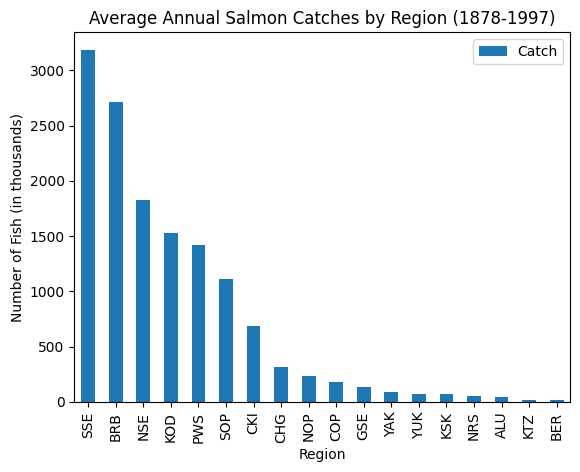

In [31]:
# Sort each region to be in descending order by average catch value
catch_region_sorted = catch_region.sort_values('Catch', ascending=False)

# Plot bar graph of average salmon catches by region 
catch_region_sorted.plot(kind = 'bar',
                         y='Catch',
                         title= "Average Annual Salmon Catches by Region (1878-1997)",
                         ylabel="Number of Fish (in thousands)")
                 

## 10

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.